In [1]:
from rdkit import Chem

In [2]:
maccs_smarts = '[F,Cl,Br,I]~*(~*)~*'
maccs_mol = Chem.MolFromSmarts(maccs_smarts)

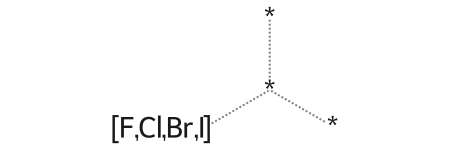

In [3]:
maccs_mol

In [8]:
from rdkit.Chem import MACCSkeys
from ..data.external import MACCSkeys


ImportError: attempted relative import with no known parent package